### Import Libraries 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

# Question 1

## 1a) 
How does the regularized estimator (predictor) $\hat{\beta}^{\text{ridge}}_0$ compare with the OLS estimator?


In [79]:
# Seed for reproducibility
np.random.seed(20240315)

# Number of observations
n = 20

# beta_0 is the true intercept, in the problem it's our only parameter since we are not considering X
beta_0 = 1

# Generate the error terms
epsilon = np.random.normal(0, 1, size=n)

# Generate the Y values based on beta_0 and epsilon
Y = beta_0 + epsilon

# Lambda for regularization
lmbda = 3.0

# Ridge estimator function for beta_0
def ridge_estimator(Y, lmbda):
    n = len(Y)
    return np.sum(Y) / (n + lmbda)

# Calculate the OLS and Ridge estimators for beta_0
ols_beta_0 = np.mean(Y)
ridge_beta_0 = ridge_estimator(Y, lmbda)


# Output the results
print(f"OLS estimator for beta_0: {ols_beta_0:.3f}")
print(f"Ridge estimator for beta_0: {ridge_beta_0:.3f}")

# Comparison
difference = ols_beta_0 - ridge_beta_0
print(f"Difference between OLS and Ridge estimators: {difference:.3f}")

print("-"*50)
print(f"""Since the OLS estimator for beta 0 is {ols_beta_0:.3f}, which is higher than the Ridge estimation of {ridge_beta_0:.3f},
this suggests that the addition of the penalty component lowers the estimation of beta 0 by {difference:.3f}.""")


OLS estimator for beta_0: 1.013
Ridge estimator for beta_0: 0.881
Difference between OLS and Ridge estimators: 0.132
--------------------------------------------------
Since the OLS estimator for beta 0 is 1.013, which is higher than the Ridge estimation of 0.881,
this suggests that the addition of the penalty component lowers the estimation of beta 0 by 0.132.


## 1b) 

Suppose that $\beta_0 = 1$ and $\varepsilon \sim N(0,\sigma^2)$ with $\sigma^2 = 4$. 
Generate a sample of size $n = 20$ from the model and compute the predicted value 
$\hat{Y} = f(\mathbf{x}) = \hat{\beta}^{\text{ridge}}_0$ for a grid of $\lambda$ values 
over the interval $[0, 20]$.

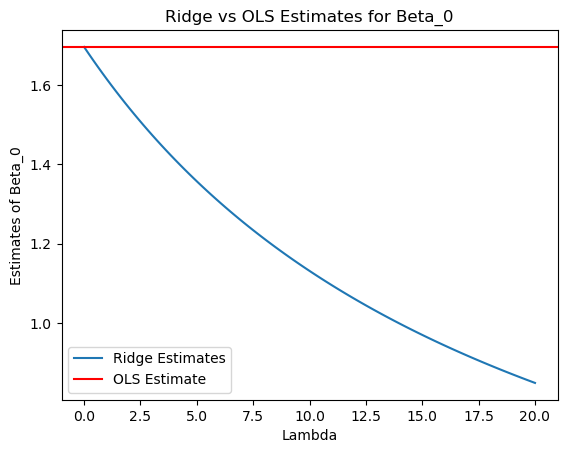

In [80]:
# b

# Generating the error terms from a normal distribution with mean 0 and variance 4
sigma = 2  # Standard deviation is the square root of the variance
var = sigma**2

# Setting epsilon
epsilon = np.random.normal(0, var, size=n)

# Generating the Y values based on beta_0 and epsilon
Y = beta_0 + epsilon

# Preparing a range of lambda values
lambda_values = np.linspace(0, 20, 100)

# Storing the ridge estimates for each lambda
ridge_estimates = [ridge_estimator(Y, lmbda) for lmbda in lambda_values]

# Plotting the Ridge estimates as a function of lambda
plt.plot(lambda_values, ridge_estimates, label='Ridge Estimates')

# Adding a horizontal line for the OLS estimate
ols_beta_0 = np.mean(Y) #duplicate from above, just for clarification purposes
plt.axhline(y=ols_beta_0, color='r', linestyle='-', label='OLS Estimate')

# Labeling the plot
plt.xlabel('Lambda')
plt.ylabel('Estimates of Beta_0')
plt.title('Ridge vs OLS Estimates for Beta_0')
plt.legend()
plt.show()

## 1c)

Repeat part b), say, 1000 times so that you end up with 1000 estimates of $\beta_0$ for 
all the $\lambda$ values that you have picked. For each value of $\lambda$, compute 
$\text{bias}^2[\hat{\beta}^{\text{ridge}}_0]$, $\text{Var}[\hat{\beta}^{\text{ridge}}_0]$ 
and $\text{MSE}[\hat{\beta}^{\text{ridge}}_0] = \text{bias}^2[\hat{\beta}^{\text{ridge}}_0] 
+ \text{Var}[\hat{\beta}^{\text{ridge}}_0]$.

In [81]:
# Number of simulations
R = 1000

# Lambda values
lambda_values = np.linspace(0, 20, 100)

# redefined ridge_estimator function
def ridge_estimator(Y, lmbda, n):
    return np.sum(Y) / (n + lmbda)

# initializing an array to store simulation results
results_array = np.zeros((R, len(lambda_values)))

# performing the simulations
for _ in range(R):
    epsilon = np.random.normal(0, var, size=n)
    Y = beta_0 + epsilon
    
    for id_a, lmbda in enumerate(lambda_values):
        results_array[_, id_a] = ridge_estimator(Y, lmbda, n)

# calculating the bias, variance, and mse for each lambda
bias_squared = (np.mean(results_array, axis=0) - beta_0)**2
variance = np.var(results_array, axis=0)
mse = np.mean((results_array - beta_0) ** 2, axis=0)

# creating df
df = pd.DataFrame({
    'lambda': lambda_values,
    'bias^2': bias_squared,
    'variance': variance,
    'mse': mse
})

# calculating mse_check
df['mse_check'] = df['bias^2'] + df['variance']

df


,lambda,bias^2,variance,mse,mse_check
0,0.000000,1.058845e-04,0.801692,0.801798,0.801798
1,0.202020,3.501297e-08,0.785738,0.785738,0.785738
2,0.404040,9.439532e-05,0.770256,0.770351,0.770351
3,0.606061,3.773071e-04,0.755227,0.755605,0.755605
4,0.808081,8.377867e-04,0.740634,0.741472,0.741472
...,...,...,...,...,...
95,19.191919,2.346818e-01,0.208773,0.443455,0.443455
96,19.393939,2.372504e-01,0.206637,0.443888,0.443888
97,19.595960,2.398065e-01,0.204534,0.444341,0.444341
98,19.797980,2.423502e-01,0.202463,0.444813,0.444813


## 1d

Plot $\text{bias}^2[\hat{\beta}^{\text{ridge}}_0]$, $\text{Var}[\hat{\beta}^{\text{ridge}}_0]$ 
and $\text{MSE}[\hat{\beta}^{\text{ridge}}_0]$ as a function of $\lambda$ and interpret 
the results. Can a ridge regression give a better prediction than OLS?


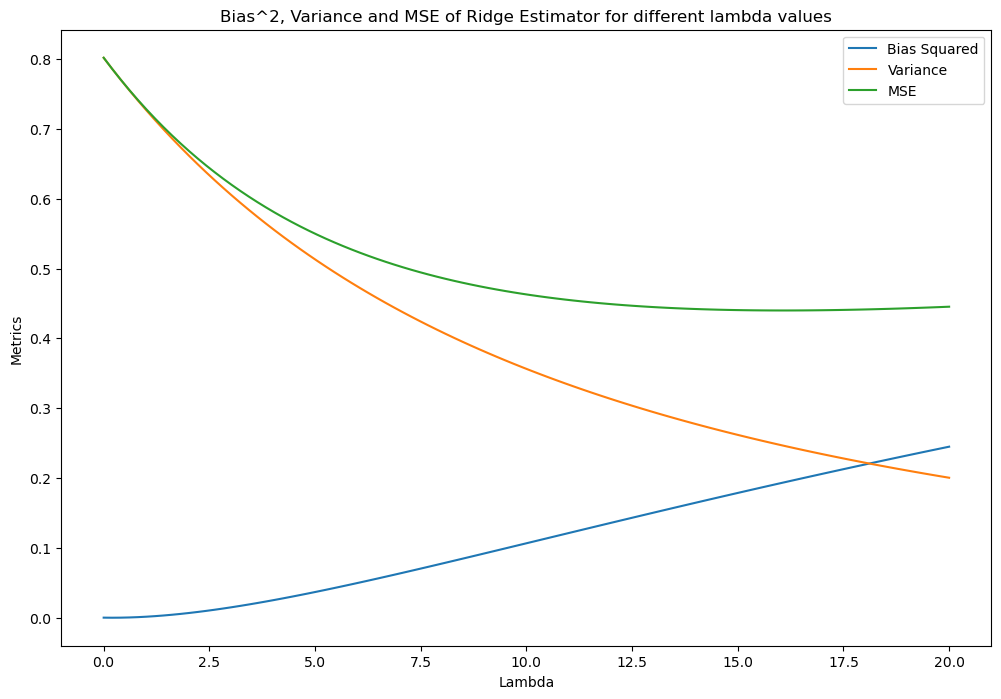

In [82]:
#d
# Create line charts for bias^2, variance, and mse
plt.figure(figsize=(12, 8))

# Bias^2
plt.plot(df['lambda'], df['bias^2'], label='Bias Squared')

# Variance
plt.plot(df['lambda'], df['variance'], label='Variance')

# MSE
plt.plot(df['lambda'], df['mse'], label='MSE')

# Labels and title
plt.xlabel('Lambda')
plt.ylabel('Metrics')
plt.title('Bias^2, Variance and MSE of Ridge Estimator for different lambda values')
plt.legend()

# Show the plot
plt.show()

### Can a ridge regression give a better prediction than OLS?


This graph alone cannot say if a ridge regression will always give a better prediction than OLS. It has the possibility of doing so though, as it does show to lower both the MSE and Variance, yet increase bias, with the increase in Lambda. It will generally depend on the actual data itself if a ridge regression will perform better. 

Typically, if there is a large amount of multicollinearity in the data if there are a very large number of features compared to the number of observations, ridge regression can outperform OLS by reducing overfitting. However, if the data has low amounts of multicollinearity and the model is not overfit, OLS might perform just as well or better.

# Question 2

ISLR Exercise 3 in Section 6.8 (p. 260). Please use the version of the textbook posted
online (7th printing).

# Question 3

Consider the 'dense' regression model discussed in the last lecture:

$$
Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_{50} X_{50i} + \varepsilon_i
$$

where $X_1, \ldots, X_{50}$ are correlated jointly normal random variables, $\varepsilon \sim \mathcal{N}(0, 2^2)$, and the regression coefficients are arbitrarily chosen numbers between 0 and 1 (not shown).

The file `PCA_data.csv` contains a training sample of size $n = 500$ and a test sample of size $m = 500$ generated from this model. The exercise below asks you to do the exercise that produces the last column of the 'Dense DGP' table on slide 22, Lecture 3. (I posted it on Moodle.)


### 3a

Load the data set called PCA_data.csv (posted). Designate the first $N_tr$ = 500
observations as the training sample and the last $N_te$ = 500 as the test sample.

In [84]:
data = pd.read_csv("PCA_data.csv")
data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,-6.539179,0.948014,1.259177,0.763472,0.128735,0.410222,0.420989,-0.101123,-1.242581,0.029933,...,-0.859282,-1.645036,-0.247500,1.372374,-0.212618,-1.368046,-1.740719,0.925212,0.123907,-1.020763
1,2.036508,0.019661,-1.951131,-1.097787,0.919061,-0.069719,0.405042,1.808955,-0.343013,1.465924,...,-1.809128,0.381091,0.497534,0.632532,-1.429868,-2.092106,0.499216,1.026407,-0.763639,-0.405548
2,7.295433,0.283019,1.127620,1.458154,0.227844,-2.003859,-1.775359,-2.480777,0.506680,0.852822,...,0.091664,0.655664,-0.191965,1.194055,0.326962,0.399151,0.723069,0.939017,-1.132469,0.212292
3,6.825405,0.845641,-0.921489,-1.368601,2.085195,-0.294420,1.029018,0.098418,-0.677591,-1.276767,...,-0.280935,-0.523440,-0.230028,1.939640,-0.429125,0.701319,-1.008541,1.055334,-0.782659,0.749695
4,-0.176432,0.566670,0.667277,-0.248455,1.361258,0.041326,0.149155,-0.271543,0.229179,0.089760,...,-0.728898,-0.124473,-0.842829,-0.132558,-0.236122,-0.751535,0.191009,0.007180,-0.350858,0.384321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.298207,1.152532,0.610173,2.956214,-1.432405,-2.397398,-0.945650,-0.952754,-0.825043,0.508768,...,1.263616,1.249821,0.778397,-0.360644,1.407061,1.214776,0.113185,-1.092583,-0.705830,-0.492108
996,2.334896,-0.434171,-0.293504,-1.437907,-0.106369,1.617408,1.136066,0.214231,0.032185,-2.389823,...,-0.334054,0.202016,-0.348515,1.547892,-0.924954,-0.393573,0.810303,-0.265939,0.290818,0.370616
997,-1.049071,-1.474982,-0.437761,-0.264495,-1.270952,0.129644,-0.668138,-0.298138,1.466069,-1.368111,...,0.424773,0.706320,-0.098820,-0.281987,0.727978,0.530025,0.860666,1.001294,0.159725,0.409749
998,-6.145876,0.349684,-0.670108,0.161680,-0.250096,-0.658828,-0.076775,-0.338317,-1.390537,-0.565669,...,1.377252,-0.221610,0.200315,0.616052,1.238358,0.175405,1.963846,-1.160791,-0.170900,-0.414812


In [85]:
# Designate the first Ntr observations as the training sample
train_sample = data.iloc[:500]

# Designate the last Nte observations as the test sample
test_sample = data.iloc[-500:]

### 3b

b) Compute the first 10 principal component vectors and the corresponding scores $Z^*_1, \ldots, Z^*_{10} \text{ for } (X_1, X_2, \ldots, X_{50}).$

For simplicity, you can use the whole data set for this (both the training sample as well as the test sample).


In [86]:
# Initialize PCA to compute the first 10 principal components
pca = PCA(n_components=10)

# Fit PCA on the dataset and transform it to get the PC scores in one step
X_pca = pca.fit_transform(data)

# PC Vectors
pc_vectors = pca.components_

print("Principal Component Vectors (each row is a PC):")
print(pc_vectors)

print("\nPrincipal Component Scores (first few rows):")
print(X_pca[:10])

Principal Component Vectors (each row is a PC):
[[ 9.42837049e-01 -3.38328771e-02  2.70643226e-02 -7.40992898e-02
   1.00721282e-01  3.33766436e-02 -1.51012441e-02 -1.83325245e-02
   9.06867650e-02  2.95458546e-02  2.88390593e-02  2.40805047e-02
   4.06484478e-02 -1.33666486e-02  7.28927275e-02  7.08165771e-02
   2.30847353e-02 -4.15986535e-02 -5.48704058e-02  1.27008560e-02
   7.07370345e-02  4.99330651e-02 -4.59697350e-02  4.11252659e-02
   1.43125485e-03 -8.27500014e-02  4.54200658e-02 -4.29773640e-02
   3.37394948e-02  5.72308073e-02  1.58583876e-02  4.30086088e-02
  -5.79353681e-03  8.39332382e-03 -1.64308586e-02 -5.09153729e-03
   7.26760367e-02  1.69014358e-02  9.78800380e-02  5.47582892e-02
   1.61202824e-03 -2.17076573e-02  9.70830384e-02  4.19119159e-02
   3.05228622e-02  8.79531521e-03  5.44632937e-03  3.39672184e-02
   4.15795034e-02  1.35422447e-02  2.96899848e-02]
 [-1.67506416e-02  4.14442559e-02 -9.80864553e-02 -2.56520722e-01
   1.74373328e-01  2.38121420e-01  2.903691

### 3c

Estimate an OLS regression of Y on a constant and $X_1, \ldots, X_{50}$ over the training sample. Estimate OLS regressions of Y on a constant and $Z^*_1, \ldots, Z^*_k$ over the training sample for $k = 1, 5, 10$.



In [90]:
# initializing the results list for appending the MSE scores
results = []

# splitting the x and y variables in the training sample
y_train = train_sample['Y'] 
X_train = train_sample.drop(columns=['Y'])

# splitting the x and y variables in the test sample
y_test = test_sample['Y'] 
X_test = test_sample.drop(columns=['Y'])

# running the linear regression on all 50 X variables
ols_x = LinearRegression().fit(X_train, y_train)

# predicting the model on itself
prediction = ols_x.predict(X_train)

# calculating the MSE
mse_ols_x = np.mean((prediction - y_test)**2)

# appending the MSE score to the results table
results.append({"Model": "OLS", "MSE": mse_ols_x})

print(f"Coefficients: {ols_x.coef_}")
print(f"MSE: {mse_ols_x}\n")
print("-"*75)

Coefficients: [-2.51544834e+04 -2.05356887e+05  2.80152378e+05  1.21008525e+05
  2.36374037e+05 -3.22328562e+04 -8.14402483e+04  3.66374449e+04
 -2.41474771e+04  1.75635850e+04  2.36048805e+04 -6.47792635e+03
 -1.15473934e+04 -1.01145835e+03 -6.43775028e+02 -1.48722213e+03
  3.40538628e+03 -1.21139429e+03  1.50591006e+03  2.63416732e+03
  3.59336590e+02  1.76991894e+03  2.96904979e+02 -2.92201621e+02
  8.46799805e+02 -5.04452442e+02 -2.19659871e+02  1.15891521e+02
 -1.72340237e+02 -9.29268160e+01 -6.84752302e+01  5.70298798e+01
  3.27774227e+01 -3.94603960e+00  4.95260425e+00  1.38703460e+01
  2.41234681e+00  1.96961054e+01  2.05815083e+00  4.80076210e+00
  1.18244076e+01 -1.79134701e+00  7.49952585e+00  9.57821838e+00
 -2.78719926e+00 -2.23772641e+00 -5.84268597e-01 -3.48923291e-01
  1.14683303e+00  1.02046650e+00]
MSE: 23.528930607677676

---------------------------------------------------------------------------


In [91]:
# performing the PCA transformation again for easier reference
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)

# formula for running the ols on different values of k
def fit_ols_for_k(k):
    # using regular slicing for numpy arrays and running the linear regression model
    model_Z = LinearRegression().fit(X_pca[:, :k], y_train)
    
    # predicting on the test set transformed into the PCA space
    prediction = model_Z.predict(X_pca[:, :k])
    
    # calculating the MSE
    mse_Z = np.mean((prediction - y_test)**2)
    
    # appending the results to the results table
    results.append({"Model": f"PCA k={k}", "MSE": mse_Z})
    
    # Print stuff
    print(f"Results for k={k}:")
    print(f"Coefficients: {model_Z.coef_}")
    print(f"MSE: {mse_Z}\n")
    print("-"*75)

# OLS regressions for k = 1, 5, 10
for k in [1, 5, 10]:
    fit_ols_for_k(k)

Results for k=1:
Coefficients: [0.01687943]
MSE: 15.026864642641465

---------------------------------------------------------------------------
Results for k=5:
Coefficients: [ 0.01687943  0.04055752 -0.40126178 -0.04866477 -0.9367122 ]
MSE: 17.429419813414164

---------------------------------------------------------------------------
Results for k=10:
Coefficients: [ 0.01687943  0.04055752 -0.40126178 -0.04866477 -0.9367122   0.52798791
 -0.53136266 -0.08113065 -0.6672775  -0.62775569]
MSE: 20.441690618275047

---------------------------------------------------------------------------


### 3d

Use the four models estimated under part c) the obtain predictions for the out-
comes $Y_i$ in the test sample. Compute the mean squared prediction error for
the four different predictions and report these numbers. You should get results
similar to those on slide 22, but there will be some differences because the whole
experiment is performed only once. (The slide averages over many experiments.)

In [92]:
pd.DataFrame(results)


,Model,MSE
0,OLS,23.528931
1,PCA k=1,15.026865
2,PCA k=5,17.429420
3,PCA k=10,20.441691


### 3e

Consider again the original ’Dense DGP’ table on slide 22, Lecture 3. Discuss
and explain the MSPE patterns you see in the first column ($N_tr$ = 75) and the
last column ($N_tr$ = 500).

\begin{array}{|c|c|c|c|}
\hline
\textbf{DENSE DGP} & N_{tr} = 75 & N_{tr} = 150 & N_{tr} = 500 \\
\hline
\text{OLS} & 12.9 & 6.0 & 4.5 \\
\text{PCA (k=1)} & 14.9 & 14.7 & 14.6 \\
\text{PCA (k=5)} & 13.6 & 13.0 & 12.7 \\
\text{PCA (k=10)} & 9.3 & 8.5 & 8.0 \\
\hline
\end{array}


The visible patterns from the above Dense DGP table from slide 22 show the increase in sample size to generally decrease the MSPE value.


###### Model Performances as N increases
**OLS**
As the OLS model is conducted over an incrementally larger number of observations, the MSPE decreases. This suggests that more observations improves the accruacy of the OLS Model. This model generally performs the best when the N value is large, but for N=75, it did not perform the best and was beaten by the PCA k=10 model. This could be related to too much noise in the OLS model, since the OLS model includes all of the variables. Furthermore, the number of variables could cause overfitting, and the small number of samples increases the error here. As PCA k=10 has a lower number of variables, it is able to reduce the amount of noise and therefore has a better MSPE. 

**PCA 1**
As the PCA k=1 model is conducted over a incrementally larger number of observations, the MSPE does decrease, but not very drastically. This could indicate that the increase in observations does not influence the accuracy of this model very much. This model generally was seen to have the least accurate predictions across all values of N. This is likely because it is not covering enough variance, as it only has one variable explaining Y. This would suggest an underfit. 

**PCA 5**
As the PCA k=5 model is conducted over a incrementally larger number of observations, the MSPE decreases as a marginally larger rate as the k=1 model. This could indicate that the increase in observations has a greater influence on improving the accuracy of this model very much with the addition of more k variables. This model does not predict very accurately compared to the other models likely because it has too few k variables, failing to explain enough of the variance in Y. This would suggest an underfit. 

**PCA 10**
As the PCA k=10 model is conducted over a incrementally larger number of observations, the MSPE decreases as a marginally larger rate as the k=5 model. This could indicate that the increase in observations has a greater influence on improving the accuracy of this model very much with the addition of more k variables. This model performs the best when N=75, for the reasons stated in the OLS model discussion above. 
